<a href="https://colab.research.google.com/github/ShaneBollinger/Coding-School/blob/main/TCS__Reproductive_Medicine_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview

##**Predicting Fetal Health with Machine Learning:** Heart Rate Variability as a Non-Invasive Marker of Autonomic Nervous System Maturation

This project uses a public fetal health classification dataset linked [here](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification) to train machine learning models that predict fetal health status based on cardiotocographic (CTG) features. The trained models, particularly a grid search–optimized Gradient Boosting classifier, demonstrate high accuracy on both training (95%) and unseen test data (90%), showing strong generalization to external cases/data.

The second part of the project focuses on interpreting the model’s most important features, specifically measures of heart rate variability (HRV), to explore their potential as non-invasive indicators of autonomic nervous system (ANS) maturation. By linking top predictive features like Abnormal Short-Term Variability to sympathetic nervous system development, the project bridges machine learning with neurophysiological insights to inform both clinical prediction and developmental research.

# Research Question Part 1
#Can we accurately predict fetal health status using cardiotocographic features?




## Columns of Dataset

Baseline value – The baby's average heart rate when resting.

Fetal_health – Baby’s health: 1 = normal, 2 = suspect, 3 = bad (pathological).

Accelerations – How often the baby’s heart rate speeds up per second.

Fetal_movement – How often the baby moves per second.

Uterine_contractions – How often the uterus tightens per second.

Light_decelerations – Small drops in the baby’s heart rate per second.

Severe_decelerations – Big, worrying drops in heart rate per second.

Prolonged_decelerations – Long-lasting drops in heart rate per second.

Abnormal_short_term_variability – % of time when heart rate changed in a bad way short-term.

Mean_value_of_short_term_variability – Average short-term changes in heart rate.

Percentage_of_time_with_abnormal_long_term_variability – % of time when heart rate changed abnormally over longer periods.

Mean_value_of_long_term_variability – Average long-term changes in heart rate.

Histogram_width – The difference between the highest and lowest heart rate.

Histogram_min – The lowest heart rate value recorded.

Histogram_max – The highest heart rate value recorded.

Histogram_number_of_peaks – Number of times heart rate hit high points.

Histogram_number_of_zeroes – Number of heart rate values that never occurred.

Histogram_mode – The most common heart rate value.

Histogram_mean – The average heart rate from the histogram.

Histogram_median – The middle heart rate value.

Histogram_median (duplicate) – Same as above (duplicate column).

Histogram_variance – How much the heart rate values spread out.

Histogram_tendency – Whether heart rate values lean high or low.



In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.preprocessing import *
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from google.colab import drive
file_path = "https://github.com/ShaneBollinger/Coding-School/blob/main/fetal_health.csv?raw=true"
df = pd.read_csv(file_path)

## Exploratory Data Analysis

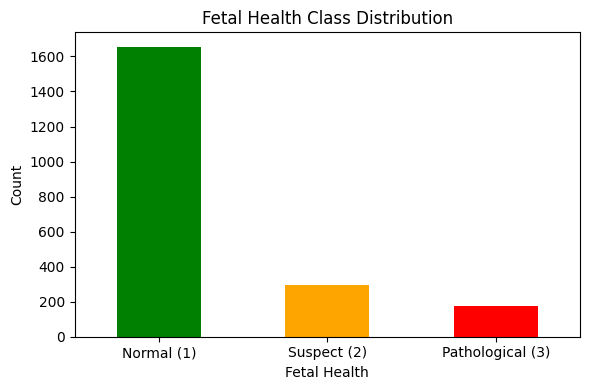

In [ ]:
# Visualize Fetal Health Distribution
plt.figure(figsize=(6, 4))
df['fetal_health'].value_counts().sort_index().plot(kind='bar', color=['green', 'orange', 'red'])
plt.xticks(ticks=[0, 1, 2], labels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'], rotation=0)
plt.title("Fetal Health Class Distribution")
plt.xlabel("Fetal Health")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
#Seems unbalanced in terms of data which is expected

([<matplotlib.axis.YTick at 0x7cdfba87b190>,
 [Text(0, 0, 'baseline value'),
  Text(0, 1, 'accelerations'),
  Text(0, 2, 'fetal_movement'),
  Text(0, 3, 'uterine_contractions'),
  Text(0, 4, 'light_decelerations'),
  Text(0, 5, 'severe_decelerations'),
  Text(0, 6, 'prolongued_decelerations'),
  Text(0, 7, 'abnormal_short_term_variability'),
  Text(0, 8, 'mean_value_of_short_term_variability'),
  Text(0, 9, 'percentage_of_time_with_abnormal_long_term_variability'),
  Text(0, 10, 'mean_value_of_long_term_variability'),
  Text(0, 11, 'histogram_width'),
  Text(0, 12, 'histogram_min'),
  Text(0, 13, 'histogram_max'),
  Text(0, 14, 'histogram_number_of_peaks'),
  Text(0, 15, 'histogram_number_of_zeroes'),
  Text(0, 16, 'histogram_mode'),
  Text(0, 17, 'histogram_mean'),
  Text(0, 18, 'histogram_median'),
  Text(0, 19, 'histogram_variance'),
  Text(0, 20, 'histogram_tendency'),
  Text(0, 21, 'fetal_health')])

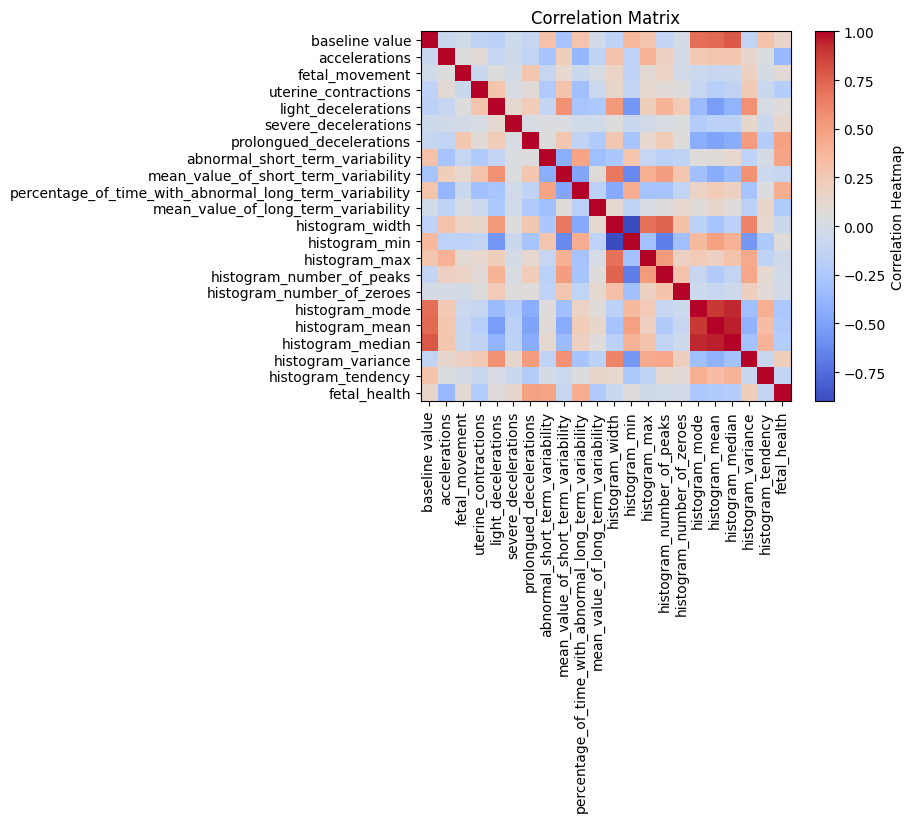

In [ ]:
#Visualizing Correlations Between Features by Creating a Confusion Matrix
corr = df.corr()

plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label= 'Correlation Heatmap')
plt.title('Correlation Matrix')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

In [ ]:
# Find columns with the highest correlation excluding histogram columns

non_histogram_columns = [col for col in df.columns if not col.startswith('histogram')]
df_non_hist = df[non_histogram_columns]

corr_non_hist = df_non_hist.corr()

# Stack the correlation matrix and remove self-correlations
stacked_corr_non_hist = corr_non_hist.stack()
stacked_corr_non_hist = stacked_corr_non_hist[stacked_corr_non_hist.index.get_level_values(0) != stacked_corr_non_hist.index.get_level_values(1)]

sorted_corr_non_hist = stacked_corr_non_hist.abs().sort_values(ascending=False)

print("Top 5 Most Correlated Column Pairs (Absolute Value, excluding histogram columns):")
print(sorted_corr_non_hist.head(10))

Top 5 Most Correlated Column Pairs (Absolute Value, excluding histogram columns):
mean_value_of_short_term_variability                    light_decelerations                                       0.562170
light_decelerations                                     mean_value_of_short_term_variability                      0.562170
fetal_health                                            prolongued_decelerations                                  0.484859
prolongued_decelerations                                fetal_health                                              0.484859
abnormal_short_term_variability                         fetal_health                                              0.471191
fetal_health                                            abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability  mean_value_of_short_term_variability                      0.470259
mean_value_of_short_term_variability                    p

In [ ]:
# We are going to drop light_decelerations from the dataset due to its collinearity to mean_value_of_short_term_variability
df = df.drop('light_decelerations', axis=1)

# Verify the column has been dropped
print("DataFrame columns after dropping 'light_decelerations':")
print(df.columns)

DataFrame columns after dropping 'light_decelerations':
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


##Model Development

### KNN Model

In [ ]:
#Using k-Nearest Neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv(file_path)

# Split features and target
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN
print("\nKNN (k=4)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN (k=4)
Accuracy: 0.8990610328638498


**Due to data gap, KNN may be at a disadvantage, so we will try a few models better fit for this problem **

### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### XGB Gradient Boosting Model

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model and print the classification report
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       333
         2.0       0.87      0.83      0.85        64
         3.0       0.90      0.97      0.93        29

    accuracy                           0.95       426
   macro avg       0.91      0.92      0.92       426
weighted avg       0.95      0.95      0.95       426



**We can still improve our best model by using gridsearch cv to implement the best hyperparamaters for the best classifcation report scores**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score for explicit scoring

# Initialize the Gradient Boosting model with random_state for reproducibility
gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 0.9],
    'min_samples_split': [2, 3]
    }

grid_search = GridSearchCV(estimator=gb_model,
                           param_grid=param_grid,
                           cv=5, #5 fold cross validation
                           scoring='accuracy',
                           n_jobs = -1,
                           verbose = 1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_gb_model = grid_search.best_estimator_
test_score = best_gb_model.score(X_test, y_test)
print("Test Score:", test_score)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
#Reevaluating Classifcation Report Scores
print("Classification Report Using Gridsearch CV")
pred = best_gb_model.predict(X_test)
print(classification_report(y_test, pred))

**Since this appears to be the best model we can get, we will run a K fold cross validation on that model to see how well it generalizes new unseen data**


In [ ]:
from sklearn.model_selection import cross_val_score

k_folds = 10
cv_scores_gb = cross_val_score(best_gb_model, X, y, cv=k_folds, scoring='accuracy')

print(f"\nGradient Boosting Model - {k_folds}-Fold Cross-Validation Accuracy (using best model from Grid Search):")
print(f"Scores: {cv_scores_gb}")
print(f"Mean Accuracy: {cv_scores_gb.mean():.4f}")
print(f"Standard Deviation: {cv_scores_gb.std():.4f}")

Mean K Fold Cross Validation Accuracy Score = 90% 🥳

## Comparing Models

In [ ]:
#Creating confusion matrices for each model
models = {
    "KNN (k=4)": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Gradient Boosting (Grid Search)": pred # Using the predictions from the best_gb_model
}

for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'],
                yticklabels=['Normal (1)', 'Suspect (2)', 'Pathological (3)'])
    plt.xlabel('Predicted Fetal Health')
    plt.ylabel('Actual Fetal Health')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [ ]:
#Comparison of classifcation report scores for each model

models_predictions = {
    "KNN (k=4)": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Gradient Boosting (Grid Search)": pred # Use predictions from the best_gb_model
}

comparison_metrics = {}

for model_name, y_pred in models_predictions.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    comparison_metrics[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision (weighted)': report['weighted avg']['precision'],
        'Recall (weighted)': report['weighted avg']['recall'],
        'F1-score (weighted)': report['weighted avg']['f1-score']
    }

comparison_df = pd.DataFrame(comparison_metrics).T

display(comparison_df)

NameError: name 'pred' is not defined

In [ ]:
#Using T-tests to statistically compare performance from each model
from scipy.stats import ttest_ind
from sklearn.model_selection import cross_val_score

# Models
models = {
    "KNN (k=4)": KNeighborsClassifier(n_neighbors=4, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Gradient Boosting (Grid Search)": best_gb_model # Use the best model from Grid Search
}

# Perform cross-validation for each model
cv_scores = {}
for model_name, model in models.items():
    # Use the full dataset X, y for cross-validation
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores

# T-tests
print("T-Tests for Model Performance:")
model_names = list(models.keys())
for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        model1_name = model_names[i]
        model2_name = model_names[j]

        t_stat, p_val = ttest_ind(cv_scores[model1_name], cv_scores[model2_name])

        print(f"\nComparing {model1_name} and {model2_name}:")
        print(f"T-Stat: {t_stat:.4f}, P-Value: {p_val:.4f}")

        if p_val > 0.05:
            print("No statistically significant difference.")
        else:
            print("Statistically significant difference.")

No significant difference in performances from models

**We can accurately predict fetal health status with using the given cardiotocographic features with 95% accuracy by using the trained XGR model above with gridsearch. We can also predict new data with 90% accuracy**

# Research Question 2

#Can variability measures in fetal heart rate be non-invasive indicators of autonomic nervous system (ANS) maturation?



##Exploratory Data Analysis

In [ ]:
# Define the independent variables (variability measures)
variability_features = [
    'abnormal_short_term_variability',
    'mean_value_of_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',
    'mean_value_of_long_term_variability'
]

X_variability = df[variability_features]

# Define the dependent variable
y_health = df['fetal_health']


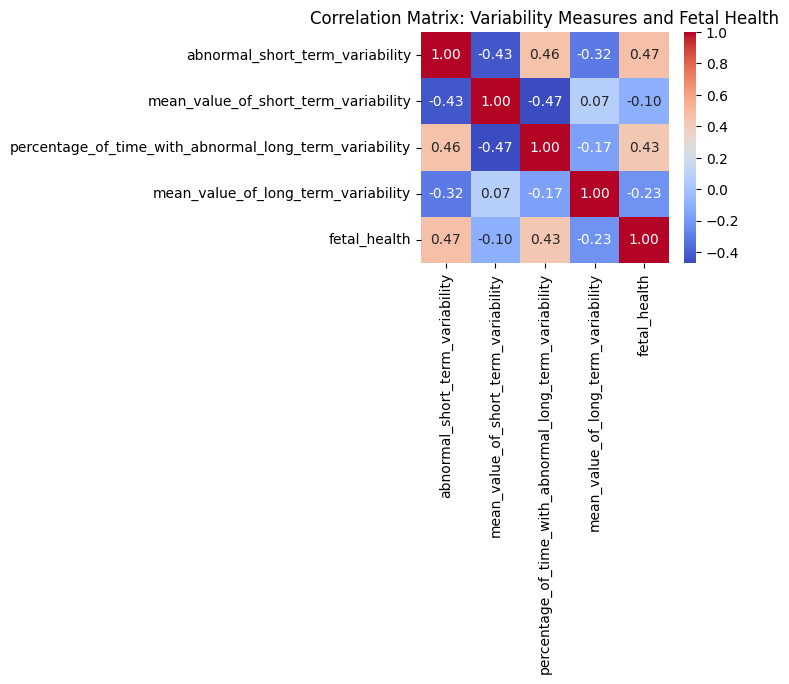

In [ ]:
# Analysing corrlation between the variables
variability_health_df = df[variability_features + ['fetal_health']]

correlation_matrix = variability_health_df.corr()

plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Variability Measures and Fetal Health')
plt.show()

HRV increases as parasympathetic effect increases until it reaches a plateau level; HRV then decreases as parasympathetic effect increases.

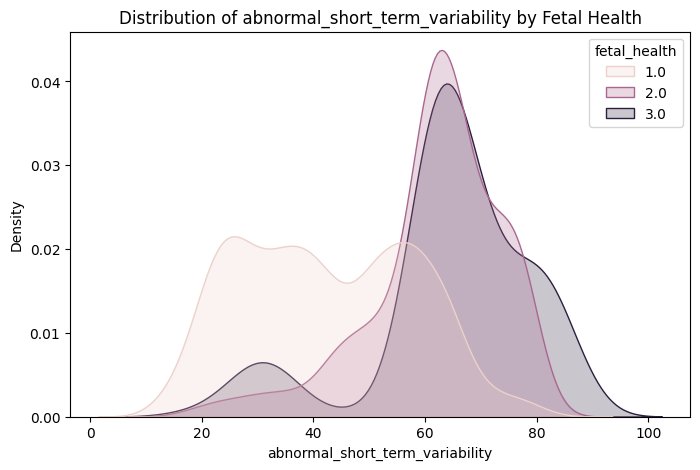

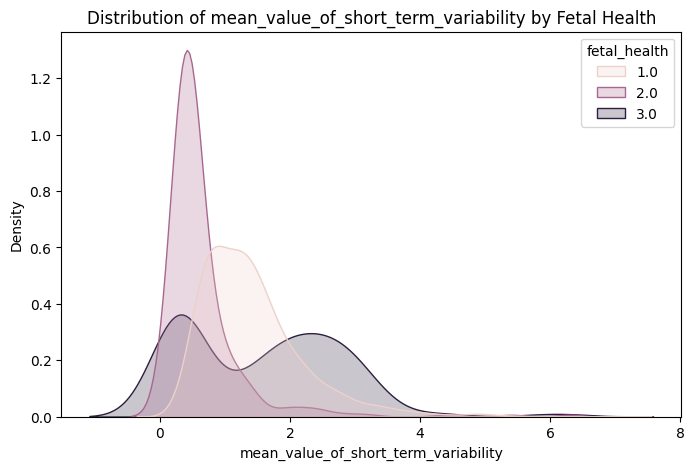

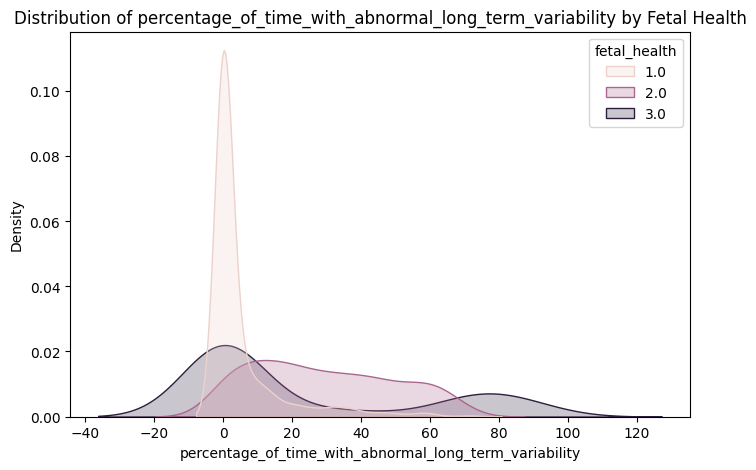

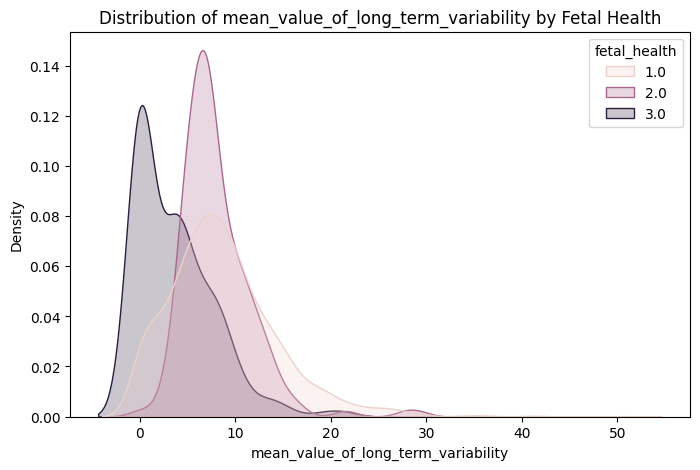

In [ ]:
#Viewing the graphs of variability by fetal health
variability_features = [
    'abnormal_short_term_variability',
    'mean_value_of_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',
    'mean_value_of_long_term_variability'
]

for feature in variability_features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=feature, hue='fetal_health', fill=True, common_norm=False)
    plt.title(f'Distribution of {feature} by Fetal Health')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

## XGR Model & Feature Correlation

In [ ]:
#Using XGR to predict fetal health status with the variability only dataset.
X_variability = df[variability_features]
y_health = df['fetal_health']

X_train_variability, X_test_variability, y_train_variability, y_test_variability = train_test_split(X_variability, y_health, test_size=0.2, random_state=42)

gb_model_variability = GradientBoostingClassifier(random_state=42)
gb_model_variability.fit(X_train_variability, y_train_variability)

y_pred_variability = gb_model_variability.predict(X_test_variability)
print("\nGradient Boosting Classification Report (Variability Features Only):")
print(classification_report(y_test_variability, y_pred_variability))

In [ ]:
#Visualizing which features are most correlated to fetal health status.
feature_importances = gb_model_variability.feature_importances_

feature_importance_series = pd.Series(feature_importances, index=X_variability.columns)

sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

print("\nFeature Importances (Variability Features Only):")
print(sorted_feature_importances)

plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='barh')
plt.title('Feature Importances of Variability Measures')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Conclusion

**Among the variability measures analyzed, Abnormal_short_term_variability showed the highest feature importance in predicting fetal health outcomes. This supports the hypothesis that specific HRV features may reflect autonomic nervous system maturation.**

Why this supports the hypothesis:

Heart rate variability, especially short-term variability, is directly regulated by the autonomic nervous system, which controls how the heart speeds up and slows down. When the ANS is not functioning properly, abnormal HRV patterns emerge. Since Abnormal_short_term_variability strongly predicts fetal health status, a proxy for neurological development, this suggests that changes in HRV reflect the maturation of the ANS. Therefore, specific HRV features can serve as non-invasive indicators of ANS development in fetuses.

Aditional Scientific Literature to support the conclusion above.

* https://pubmed.ncbi.nlm.nih.gov/29604064/
* https://pubmed.ncbi.nlm.nih.gov/19179746/





Created by Shane Bollinger with help from


*   The Coding School (Program)
*   Noah Royce (TA)
*   Kyla Gabriel (Mentor)

    8/1/2025